# **Stock Price Prediction Using LSTM**

We would predicting the stock price of stock "SBIN" using LSTM . We would intially train the data that we will be importing using library function and then , try to predict price for that particular stock.

# Importing all the library files

In [2]:
#Importing all the required library files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# 1. Analyzing the Train Dataset

# Load the dataset

In [12]:
#Importing training data from dataset
stk_data=pd.read_csv('Traindata_SBI.csv')

# Get the first five rows of the dataset.
stk_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2013,240.490005,243.404999,239.755005,242.645004,162.694351,17202300.0
1,02-01-2013,245.000000,246.399994,243.815002,245.054993,164.310226,14660120.0
2,03-01-2013,246.000000,248.240005,243.619995,247.160004,165.721664,20103090.0
3,04-01-2013,246.000000,249.294998,245.065002,248.669998,166.734131,13705950.0
4,07-01-2013,249.000000,249.899994,246.175003,246.759995,165.453461,10264490.0


In [13]:
# Get the last five rows of the dataset.
stk_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1474,21-12-2018,293.649994,296.500000,290.799988,291.899994,291.899994,15777301.0
1475,24-12-2018,293.500000,295.000000,290.149994,293.049988,293.049988,12048877.0
1476,26-12-2018,292.850006,295.000000,287.149994,294.149994,294.149994,12684324.0
1477,27-12-2018,296.700012,297.600006,291.500000,292.149994,292.149994,15304564.0
1478,28-12-2018,293.600006,297.100006,293.549988,294.799988,294.799988,12876558.0


# Descriptive Statistics

In [14]:
# get dataframe dimensions
print("Database dimension     :",stk_data.shape)
print("Database size          :",stk_data.size)

# get info about the dataframe (columns,entries,datatype etc...)
stk_data.info()     

# describe the dataframe and get statistics
stk_data.describe()

Database dimension     : (1479, 7)
Database size          : 10353
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1479 non-null   object 
 1   Open       1477 non-null   float64
 2   High       1477 non-null   float64
 3   Low        1477 non-null   float64
 4   Close      1477 non-null   float64
 5   Adj Close  1477 non-null   float64
 6   Volume     1477 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.0+ KB


,Open,High,Low,Close,Adj Close,Volume
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1.477000e+03
mean,246.575487,249.658544,243.073571,246.134370,233.764467,1.922232e+07
std,45.364043,45.809890,44.768840,45.237697,55.926409,1.239268e+07
min,147.000000,148.490005,145.270004,147.360001,122.275307,0.000000e+00
25%,215.000000,218.330002,212.740005,216.000000,180.329224,1.290092e+07
50%,254.649994,257.450012,251.259995,254.225006,250.399994,1.651432e+07
75%,278.450012,281.899994,274.850006,277.950012,274.864258,2.193665e+07
max,345.000000,351.299988,336.000000,337.500000,337.500000,2.626771e+08


Missing Values

In [15]:
#Dropping of unneccessary columns in dataframe
stk_data['Date'] = stk_data.index
stk_data=stk_data.drop(['Adj Close','Volume'],axis=1)

#Determining the number of NAN values in dataframe
stk_data.isnull().sum()

Date     0
Open     2
High     2
Low      2
Close    2
dtype: int64

In [16]:
#Replacing the nan values with mean of their respective column
item_list=['Open','High','Low','Close']
for item in item_list:
  stk_data[item]=stk_data[item].fillna(stk_data[item].mean())

stk_data.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Duplicated Values

In [17]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
stk_data.duplicated().sum()

0

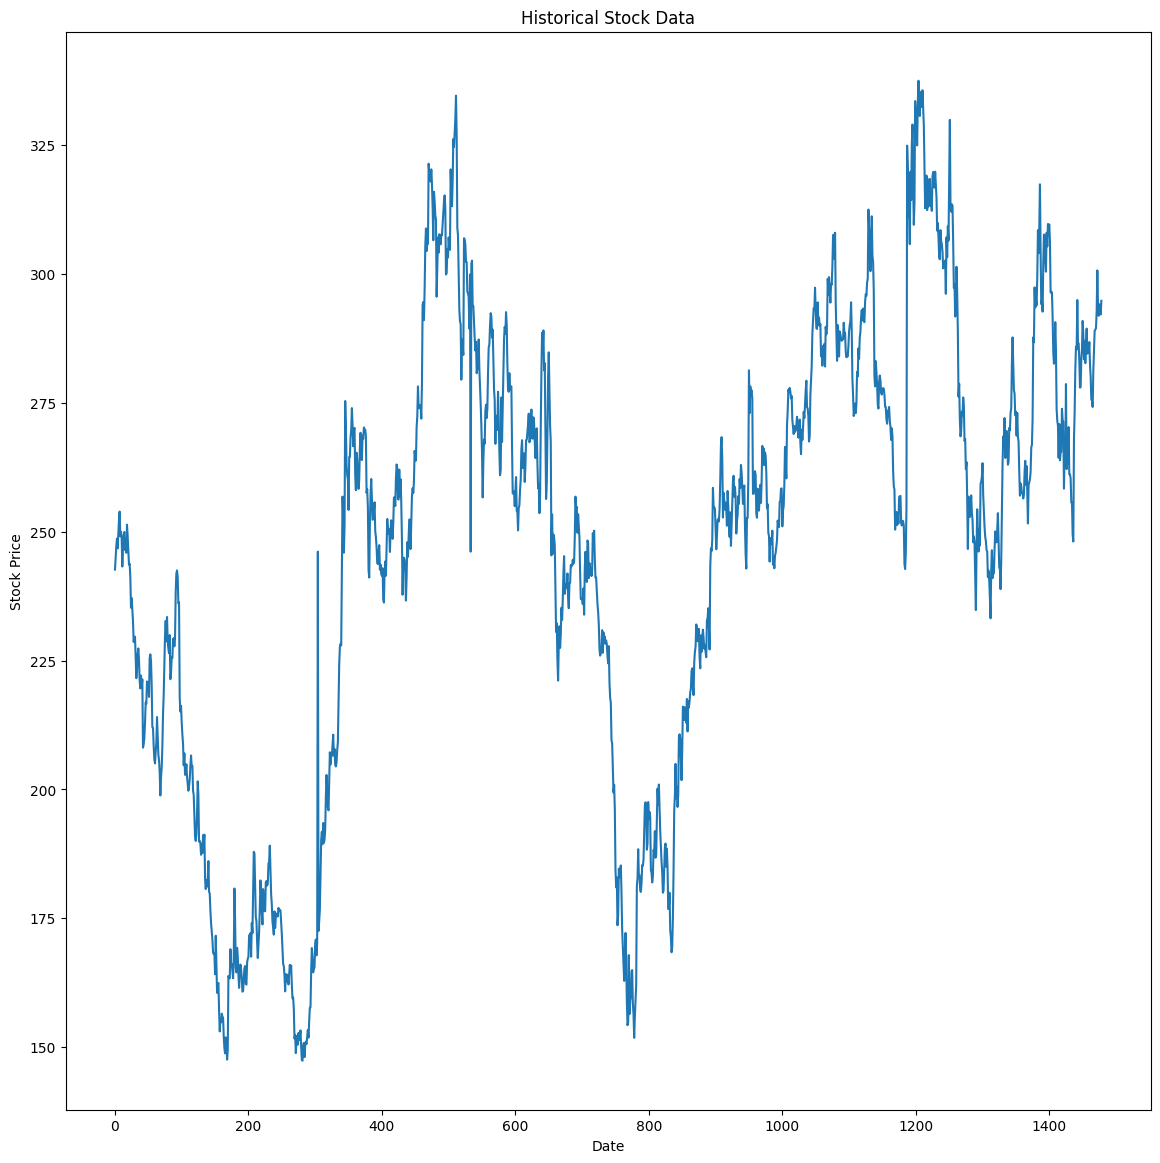

In [18]:
# Visualising the above dataset

plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [19]:
# Preprocessing of data for LSTM model
train_set=stk_data.iloc[:,1:2].values
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(train_set)
X_train=[]
y_train=[]
for i in range(60,1478):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [20]:
# Defining the LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [21]:
# Training the LSTM model for the given dataset
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=20,batch_size=24)

Epoch 1/20
60/60 [==============================] - 44s 160ms/step - loss: 0.0404
Epoch 2/20
60/60 [==============================] - 10s 163ms/step - loss: 0.0101
Epoch 3/20
60/60 [==============================] - 10s 167ms/step - loss: 0.0081
Epoch 4/20
60/60 [==============================] - 10s 168ms/step - loss: 0.0090
Epoch 5/20
60/60 [==============================] - 9s 158ms/step - loss: 0.0074
Epoch 6/20
60/60 [==============================] - 10s 161ms/step - loss: 0.0070
Epoch 7/20
60/60 [==============================] - 10s 165ms/step - loss: 0.0066
Epoch 8/20
60/60 [==============================] - 9s 151ms/step - loss: 0.0066
Epoch 9/20
60/60 [==============================] - 9s 152ms/step - loss: 0.0069
Epoch 10/20
60/60 [==============================] - 9s 154ms/step - loss: 0.0056
Epoch 11/20
60/60 [==============================] - 9s 150ms/step - loss: 0.0050
Epoch 12/20
60/60 [==============================] - 9s 149ms/step - loss: 0.0051
Epoch 13/20
60/60 [

# 2. Analyzing the Test Dataset

In [22]:
# Importing data for testing purpose
testdataframe=pd.read_csv('Testdata_SBI.csv')
testdataframe['Date'] = testdataframe.index

# Dropping unnecesaary column from dataframe
testdataframe=testdataframe.drop(['Adj Close','Volume'],axis=1)

# Determining nan values in testdataframe
testdataframe.isnull().sum()

Date     0
Open     1
High     1
Low      1
Close    1
dtype: int64

In [23]:
# Replacing the nan values with mean of their respective columns
item_list=['Open','High','Low','Close']
for item in item_list:
  testdataframe[item]=testdataframe[item].fillna(testdataframe[item].mean())

testdataframe.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [24]:
# Get dataframe dimensions
print("Database dimension     :",testdataframe.shape)
print("Database size          :",testdataframe.size)

# Get info about the dataframe (columns,entries,datatype etc...)
testdataframe.info()     

# Describe the dataframe and get statistics
testdataframe.describe()

Database dimension     : (364, 5)
Database size          : 1820
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    364 non-null    int64  
 1   Open    364 non-null    float64
 2   High    364 non-null    float64
 3   Low     364 non-null    float64
 4   Close   364 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 14.3 KB


,Date,Open,High,Low,Close
count,364.000000,364.000000,364.000000,364.000000,364.000000
mean,181.500000,285.291736,289.358816,280.277272,284.586776
std,105.221988,57.720702,57.604794,57.883896,57.872354
min,0.000000,151.949997,153.199997,149.449997,150.850006
25%,90.750000,267.550010,270.949997,263.075012,267.512497
50%,181.500000,301.024994,304.824997,295.275009,300.324997
75%,272.250000,325.762497,330.962509,321.887504,324.275002
max,363.000000,371.950012,373.799988,366.200012,372.399994


In [28]:
# Determining X_test and y_test using testdataframe
real_stock_price = testdataframe.iloc[:, 1:2].values[:175]
dataset_total = pd.concat((testdataframe['Open'], testdataframe['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdataframe) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [29]:
# Predicting the stock prices using the above trained model
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

6/6 [==============================] - 4s 68ms/step


In [30]:
# Determining metrics for the given model

# Mean Squared Error for given LSTM model
mse=mean_squared_error(real_stock_price,predicted_stock_price)
print("Mean Squared Error for given LSTM model:",mse)

# Mean Absolute Error for given LSTM model
mae=mean_absolute_error(real_stock_price,predicted_stock_price)
print("Mean Absolute Error for given LSTM model:",mae)

# R-squared Error for given LSTM model
r2=r2_score(real_stock_price,predicted_stock_price)
print("R-Squared Error for given LSTM model:",r2)

# Root Mean Squared Error for given LSTM model
rmse=mse**0.5
print("Root Mean Squared Error for given LSTM model:",rmse)


Mean Squared Error for given LSTM model: 361.56372545859347
Mean Absolute Error for given LSTM model: 11.699004092466517
R-Squared Error for given LSTM model: 0.6061790816815456
Root Mean Squared Error for given LSTM model: 19.014829093594123


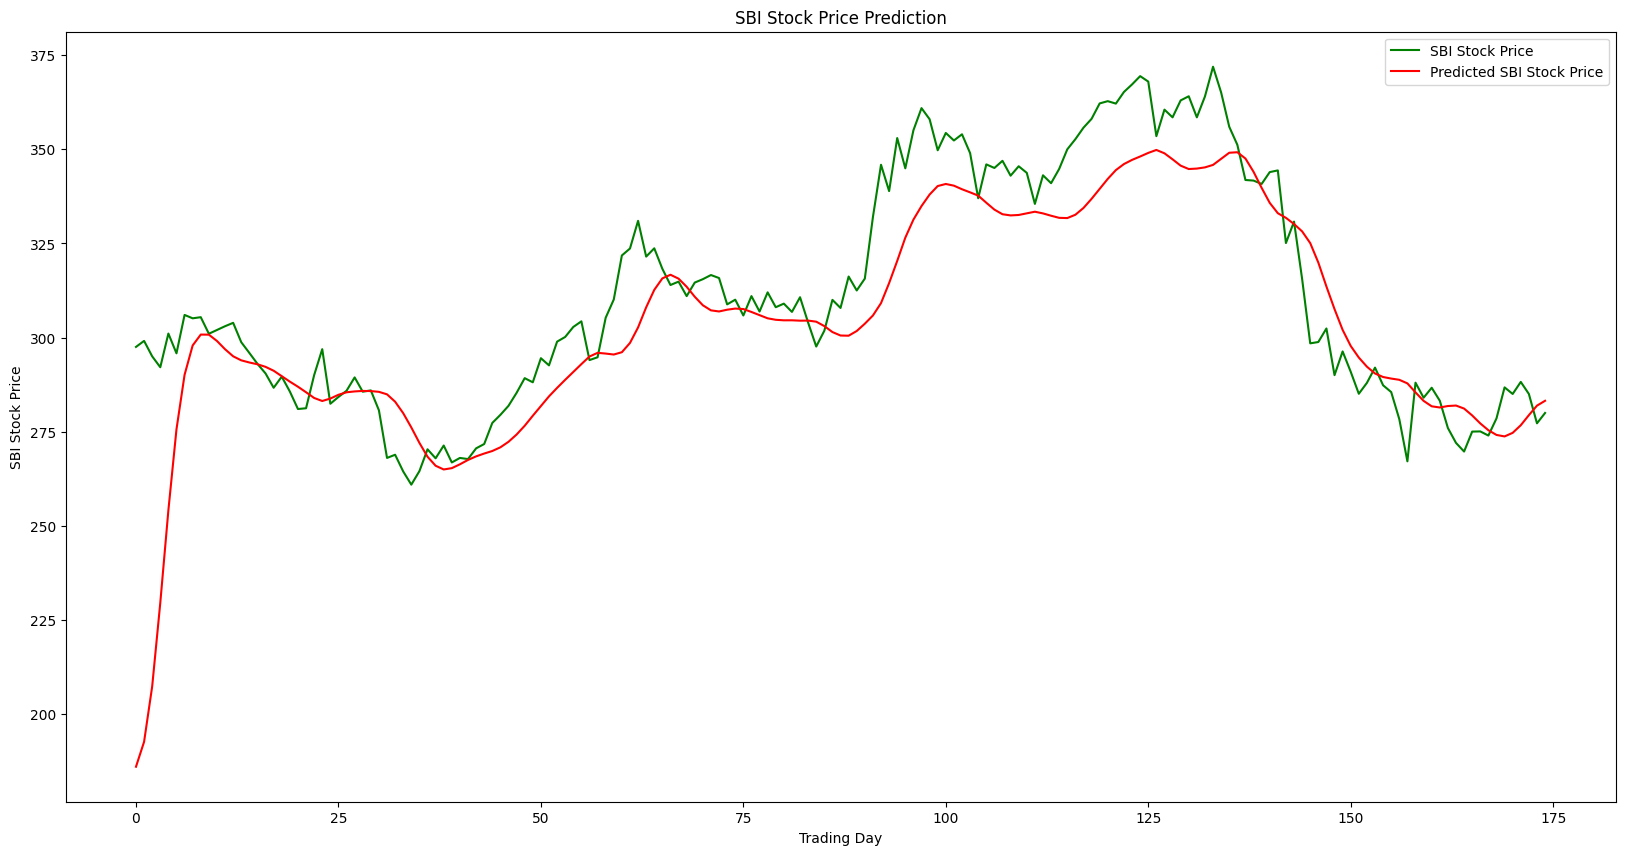

In [31]:
# Plotting of Real stock price along with predicted stock price
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

# Author(s)

Vincent Mukomba